# 2. DFS (Busca em Profundidade / Depth-First Search)
---

## 🔍 Problema Simulado: Auditoria de Conectividade Profunda (Rotas Longas)

**Cenário de Logística:**
Uma transportadora precisa verificar se existe uma rota viável do **CD Central (A)** até uma cidade remota (**Cidade P**) sem passar por bloqueios. Diferente da entrega expressa (que quer o caminho mais curto), aqui a prioridade é **explorar a viabilidade** de um ramo inteiro da rede até o fim antes de desistir e tentar outro.

**O Algoritmo:**
O DFS funciona como um explorador em um labirinto:
1.  Escolhe um caminho e segue em frente o máximo possível.
2.  Se encontrar um beco sem saída, faz o **backtracking** (volta um passo) e tenta o próximo desvio.
3.  Utiliza uma estrutura de **Pilha (Stack)** ou **Recursão**.

---

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# --- 1. DEFINIÇÃO DO GRAFO (REDE LOGÍSTICA) ---
# Grafo com 16 vértices (A a P) representando CDs e Cidades
rede_logistica = {
    'A': ['B', 'C', 'D'],      # CD Central
    'B': ['A', 'E', 'F'],
    'C': ['A', 'G'],
    'D': ['A', 'H', 'I'],
    'E': ['B', 'J'],
    'F': ['B', 'K'],
    'G': ['C', 'L'],
    'H': ['D', 'M'],
    'I': ['D', 'N'],
    'J': ['E', 'O'],
    'K': ['F', 'P'],
    'L': ['G'],
    'M': ['H'],
    'N': ['I'],
    'O': ['J'],
    'P': ['K']
}

In [9]:
# --- 2. ALGORITMO DFS (RECURSIVO) ---
def dfs_caminho(grafo, atual, destino, visitados=None, caminho=None):
    """
    Busca em Profundidade para encontrar UM caminho entre origem e destino.
    Retorna a lista de cidades visitadas na ordem da rota encontrada.
    """
    # Inicialização na primeira chamada
    if visitados is None:
        visitados = set()
    if caminho is None:
        caminho = []
    
    # Marca a cidade atual como visitada e adiciona ao trajeto
    visitados.add(atual)
    caminho.append(atual)
    
    # Caso base: Chegamos ao destino?
    if atual == destino:
        return caminho
    
    # Passo recursivo: Mergulha nos vizinhos
    for vizinho in grafo.get(atual, []):
        if vizinho not in visitados:
            # Tenta encontrar o destino a partir deste vizinho
            resultado = dfs_caminho(grafo, vizinho, destino, visitados, caminho)
            if resultado: # Se encontrou lá no fundo, retorna o sucesso
                return resultado
    
    # Backtracking: Se explorou tudo e não achou, remove do caminho atual e volta
    caminho.pop()
    return None

In [10]:
# --- 3. VISUALIZAÇÃO GRÁFICA ---
def desenhar_rota_dfs(grafo_dict, rota):
    G = nx.Graph(grafo_dict)
    # Layout fixo para o desenho ficar igual sempre
    pos = nx.spring_layout(G, seed=42) 
    
    plt.figure(figsize=(12, 7))
    
    # Desenha o grafo base (cinza)
    nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=1500, edge_color='gray')
    
    if rota:
        # Destaca a rota encontrada em VERMELHO
        nx.draw_networkx_nodes(G, pos, nodelist=rota, node_color='#FF6347', node_size=1600)
        
        # Cria lista de arestas da rota (A-B, B-C...) para pintar
        arestas_rota = list(zip(rota, rota[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=arestas_rota, edge_color='#FF6347', width=3)
        
        plt.title(f"DFS: Rota de Auditoria Encontrada ({len(rota)-1} saltos)", fontsize=14)
    else:
        plt.title("DFS: Rota Impossível (Destino inalcançável)", fontsize=14)
    
    plt.show()

--- Iniciando Auditoria de Rota (DFS) de A para P ---
✅ Rota Viável Identificada: A -> B -> F -> K -> P


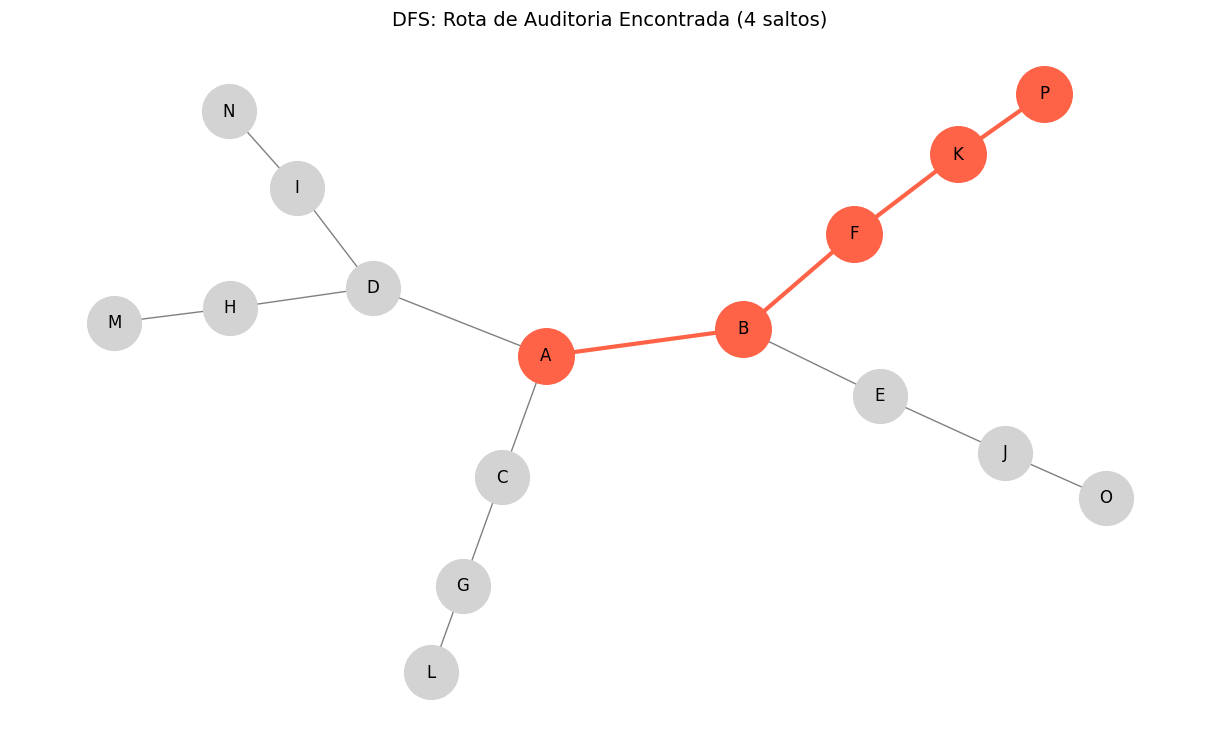

In [11]:
# --- 4. EXECUÇÃO DO TESTE ---
origem = 'A'
destino = 'P' # Uma cidade bem distante na rede

print(f"--- Iniciando Auditoria de Rota (DFS) de {origem} para {destino} ---")
rota_encontrada = dfs_caminho(rede_logistica, origem, destino)

if rota_encontrada:
    print(f"✅ Rota Viável Identificada: {' -> '.join(rota_encontrada)}")
    desenhar_rota_dfs(rede_logistica, rota_encontrada)
else:
    print("❌ Não existe caminho viável entre os pontos.")